In [168]:
import pandas as pd
import numpy as np 

data =pd.read_csv('garments_worker_productivity.csv')

In [169]:
# df.apply(lambda x: x.fillna(x.mean()),axis=0)
data['wip'] = data['wip'].fillna(data['wip'].median())
data.head()


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [170]:
# polynomial regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# clf = GridSearchCV(estimator=PolynomialFeatures(),
#              param_grid={'degree': [2,3,4,5,6]})
x = data[['smv', 'incentive','over_time', 'no_of_workers', 'targeted_productivity', 'team', 'wip']]
# x['department'] = le.fit_transform(data['department'])
# x['day'] = le.fit_transform(data['day'])
# x['quarter'] = le.fit_transform(data['quarter'])

y = data['actual_productivity']

In [171]:
x.head()

,smv,incentive,over_time,no_of_workers,targeted_productivity,team,wip
0,26.16,98,7080,59.0,0.80,8,1108.0
1,3.94,0,960,8.0,0.75,1,1039.0
2,11.41,50,3660,30.5,0.80,11,968.0
3,11.41,50,3660,30.5,0.80,12,968.0
4,25.90,50,1920,56.0,0.80,6,1170.0


## Hyperparameter tuning: degree of polynomial regression

In [172]:
for i in range(1,7):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
  poly = PolynomialFeatures(degree=i)
  xp_train = poly.fit_transform(X_train)
  clf = linear_model.LinearRegression()
  clf.fit(xp_train, y_train)
  xp_test = poly.fit_transform(X_test)
  y_predict = clf.predict(xp_test)
  y_predict_train=clf.predict(xp_train)
  print('Degree ',i)
  print('RMSE for training data: ', np.sqrt(mean_squared_error(y_train,y_predict_train)))
  print('RMSE for test data: ', np.sqrt(mean_squared_error(y_test,y_predict)))
  print('\n')

Degree  1
RMSE for training data:  0.14840379847934865
RMSE for test data:  0.15735236288120372


Degree  2
RMSE for training data:  0.12756165562933863
RMSE for test data:  0.14898121251025978


Degree  3
RMSE for training data:  0.11502686249785972
RMSE for test data:  0.22477532079158513


Degree  4
RMSE for training data:  0.10501704824506307
RMSE for test data:  5.786248886647528


Degree  5
RMSE for training data:  0.10785458526231195
RMSE for test data:  165.0303743786791


Degree  6
RMSE for training data:  0.10276380418610588
RMSE for test data:  1537.9543178056726




## Visualization of the polynomial prediction

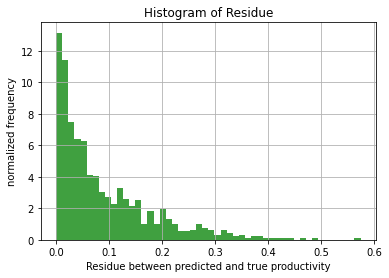

In [173]:
import matplotlib.pyplot as plt
poly = PolynomialFeatures(degree=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
xp_train = poly.fit_transform(X_train)
clf = linear_model.LinearRegression()
clf.fit(xp_train, y_train)
xp_test = poly.fit_transform(X_test)
y_predict = clf.predict(xp_test)
y_predict_train=clf.predict(xp_train)
ts_train = [i for i in range(len(y_predict_train))]
ts_test = [len(y_predict_train)+i for i in range(len(y_predict))]
# plt.plot(ts_train, y_predict_train.tolist(), color ='blue')
# plt.plot(ts_train, y[:len(ts_train)], color ='red')

n, bins, patches = plt.hist([abs(y_predict_train[i] - y_train.tolist()[i]) for i in range(len(ts_train))], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Residue between predicted and true productivity')
plt.ylabel('normalized frequency')
plt.title('Histogram of Residue')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 1)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

The above graph is a visualization of prediction on the training dataset with polynomial of degree 2. X-axis is the frequency and the y-axis is the residue. From the residue we can see the the model performs great|.

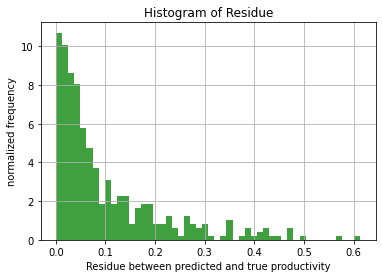

In [174]:
# plt.plot(ts_test, y_predict.tolist(), color ='blue')
# plt.plot(ts_test, y[:len(ts_test)], color ='red')
n, bins, patches = plt.hist([abs(y_predict[i] - y_test.tolist()[i]) for i in range(len(ts_test))], 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Residue between predicted and true productivity')
plt.ylabel('normalized frequency')
plt.title('Histogram of Residue')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 1)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

The above graph is the visualization of predictin on testing dataset with polynomial of degree 2.  X-axis is the frequency and the y-axis is the residue. From the residue we can see the the model performs great|.

## Time series prediction

In [148]:
# x = data[['smv', 'incentive','over_time', 'no_of_workers', 'targeted_productivity', 'team', 'wip']]
# create time seires data by using mean:
data_ts = data.groupby(data['date']).mean()
data_ts.head(19)




,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,
1/1/2015,6.368421,0.752632,15.000526,929.421053,3972.631579,28.894737,0.0,0.0,0.0,35.473684,0.718711
1/10/2015,6.272727,0.754545,13.750455,1001.636364,5836.363636,28.636364,0.0,0.0,0.0,33.090909,0.771305
1/11/2015,6.260870,0.767391,14.252609,1005.304348,5486.086957,21.695652,0.0,0.0,0.0,31.869565,0.749045
1/12/2015,6.260870,0.741304,14.021304,968.391304,5218.695652,22.695652,0.0,0.0,0.0,31.717391,0.755194
1/13/2015,6.272727,0.729545,14.941818,978.909091,6046.363636,25.318182,0.0,0.0,0.0,32.863636,0.755566
1/14/2015,6.428571,0.721429,14.136667,1041.190476,4444.285714,21.523810,0.0,0.0,0.0,31.547619,0.705987
1/15/2015,6.421053,0.697368,14.715263,1050.631579,6582.631579,25.157895,0.0,0.0,0.0,37.342105,0.758076
1/17/2015,6.523810,0.747619,15.666667,1024.571429,5910.000000,26.142857,0.0,0.0,0.0,33.785714,0.730730
1/18/2015,7.052632,0.731579,17.839474,1046.842105,6227.368421,26.631579,0.0,0.0,0.0,36.631579,0.677029


## Using linear regression om time series to predict the next team with previous 11 teams:

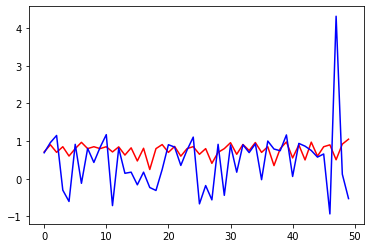

In [149]:
y_true = []
y_predict = []
for i in range(50):
    x_train = x[i*12:i*12+11]
    y_true.append(y[i*12+11])
    poly = PolynomialFeatures(degree=2)
    xp_train = poly.fit_transform(X_train)
    clf1 = linear_model.LinearRegression()
    clf2 = linear_model.LinearRegression()
    clf1.fit([[i] for i in range(1,4)],x_train[-3:])
    x_test = clf1.predict([[4]])
    clf2.fit(xp_train, y_train)
    xp_test = poly.fit_transform(x_test)
    y_p = clf2.predict(xp_test)
    y_predict.append(y_p)


plt.plot([i for i in range(len(y_true))], y_true, color ='red')
plt.plot([i for i in range(len(y_predict))],y_predict, color ='blue')
plt.show()
    
    

We have using last 11 teams to predict the next team based on the time series data 50 times, and plot each prediction on the above graph. The blue line is the predicted productivity and red is the ground true. We can see the trend is almost the same. Note the last prediction is entirely wrong and that maybe an outlier in our model

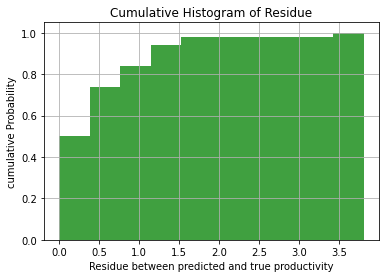

In [150]:
n, bins, patches = plt.hist([abs(y_true[i] - y_predict[i])[0] for i in range(len(y_true))], density=True, cumulative=True, facecolor='g', alpha=0.75)

plt.xlabel('Residue between predicted and true productivity')
plt.ylabel('cumulative Probability')
plt.title('Cumulative Histogram of Residue')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.xlim(0, 1)
# plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

## predicting April from Jan to March data

In [161]:
team1_ts = data.loc[data['team'] == 1].groupby(data['date']).mean()
team2_ts = data.loc[data['team'] == 2].groupby(data['date']).mean()
team3_ts = data.loc[data['team'] == 3].groupby(data['date']).mean()
team4_ts = data.loc[data['team'] == 4].groupby(data['date']).mean()
team5_ts = data.loc[data['team'] == 5].groupby(data['date']).mean()
team6_ts = data.loc[data['team'] == 6].groupby(data['date']).mean()
team7_ts = data.loc[data['team'] == 7].groupby(data['date']).mean()
team8_ts = data.loc[data['team'] == 8].groupby(data['date']).mean()
team9_ts = data.loc[data['team'] == 9].groupby(data['date']).mean()
team10_ts = data.loc[data['team'] == 10].groupby(data['date']).mean()
team11_ts = data.loc[data['team'] == 11].groupby(data['date']).mean()
team12_ts = data.loc[data['team'] == 12].groupby(data['date']).mean()

In [162]:
teams = [team1_ts, team2_ts, team3_ts, team4_ts, team5_ts, team6_ts, team7_ts, 
         team8_ts, team9_ts, team10_ts, team11_ts, team12_ts]

In [167]:
j = 1
for team in teams:
    clf1 = linear_model.LinearRegression()
    clf2 = linear_model.LinearRegression()
    clf1.fit([[i] for i in range(1,len(team)+1)],team[['smv', 'incentive','over_time', 'no_of_workers', 'targeted_productivity', 'wip']])
    clf2.fit(team[['smv', 'incentive','over_time', 'no_of_workers', 'targeted_productivity', 'wip']], team['actual_productivity'])
    x_test = clf1.predict([[i] for i in range(len(team)+1, len(team)+31)])
    y_predict = clf2.predict(x_test)
    print('{} is the average productivity for team {} in April'.format(sum(y_predict)/len(y_predict), j))
    j+=1
    

0.7942496108821457 is the average productivity for team 1 in April
0.7563370520109626 is the average productivity for team 2 in April
0.8440804430415306 is the average productivity for team 3 in April
0.712711851939649 is the average productivity for team 4 in April
0.6224588953082214 is the average productivity for team 5 in April
0.5646118120519402 is the average productivity for team 6 in April
0.5629909086694233 is the average productivity for team 7 in April
0.6235995437378015 is the average productivity for team 8 in April
0.6728455998399568 is the average productivity for team 9 in April
0.7303674880643903 is the average productivity for team 10 in April
0.8314735465605405 is the average productivity for team 11 in April
0.8504891955372783 is the average productivity for team 12 in April
